In [76]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Example section

### Agent training

In [77]:
from transformers import AutoImageProcessor
import torch
from torch.utils.data import DataLoader

from uav_active_sensing.pytorch_datasets import TinyImageNetDataset, tiny_imagenet_collate_fn
from uav_active_sensing.modeling.img_env.img_exploration_env import RewardFunction, ImageExplorationEnv, ImageExplorationEnvConfig
from uav_active_sensing.modeling.mae.act_vit_mae import ActViTMAEForPreTraining
# from uav_active_sensing.modeling.ppo import train_ppo, make_env, PPOConfig, PPOAgent
from uav_active_sensing.plots import visualize_tensor

from stable_baselines3 import PPO, SAC
from uav_active_sensing.modeling.agents.rl_agent_feature_extractor import CustomResNetFeatureExtractor

In [97]:
rl_num_envs = 1
rl_batch_size = 4
rl_num_steps = rl_batch_size * rl_num_envs * 4

image_processor = AutoImageProcessor.from_pretrained("facebook/vit-mae-base", use_fast=True)
tiny_imagenet_train_dataset = TinyImageNetDataset(split="train", transform=image_processor)
tiny_imagenet_train_loader = DataLoader(tiny_imagenet_train_dataset, batch_size=10, collate_fn=tiny_imagenet_collate_fn)

# Pretrained model and reward function
model = ActViTMAEForPreTraining.from_pretrained("facebook/vit-mae-base")
reward_function = RewardFunction(model)

# Create a dummy environment to initialize the model
dummy_batch = next(iter(tiny_imagenet_train_loader))  # Take one image as a dummy input for env initialization
env_config = ImageExplorationEnvConfig(img=dummy_batch, reward_function=reward_function)


### Batch env

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0494049..2.64].


16
16
0
[[ 0.80381453 -0.19792181 -0.879593  ]
 [-0.23375985 -0.9376919   0.56161   ]
 [ 0.72964805 -0.6797787  -0.28530154]
 [ 0.81500876  0.3156692   0.44196457]
 [ 0.32977527 -0.74180275 -0.73742616]
 [ 0.9717802   0.609508    0.4009065 ]
 [-0.60117006  0.27340835 -0.01960804]
 [-0.3076415  -0.760397   -0.7013104 ]
 [ 0.15021317  0.72463703 -0.6112254 ]
 [ 0.8692928  -0.2835537  -0.4250868 ]]
tensor([[ 12,  -3,   0],
        [ -3, -15,   0],
        [ 11, -10,   0],
        [ 13,   5,   0],
        [  5, -11,   0],
        [ 15,   9,   0],
        [ -9,   4,   0],
        [ -4, -12,   0],
        [  2,  11,   0],
        [ 13,  -4,   0]], dtype=torch.int32)
[[-0.39289752  0.5146143   0.0326576 ]
 [ 0.5869034   0.69320726  0.31190702]
 [ 0.12404898 -0.2280812   0.17080466]
 [-0.92334145 -0.4081553  -0.8314583 ]
 [-0.8853362  -0.55971754  0.09053179]
 [ 0.85162497  0.13622183 -0.81351846]
 [-0.38040388  0.9451169  -0.07434779]
 [ 0.05989992 -0.5211077   0.25948712]
 [ 0.61673856 -0.76

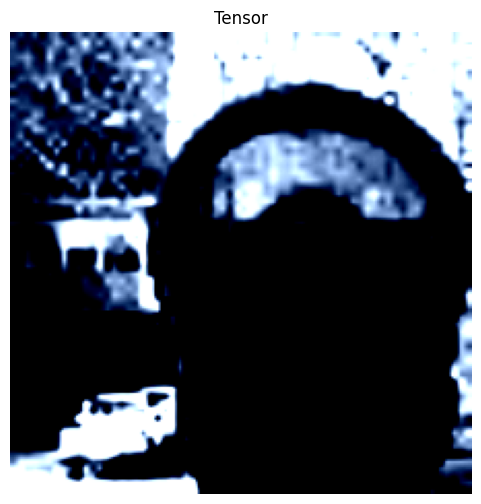

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.7754089..1.8905447].


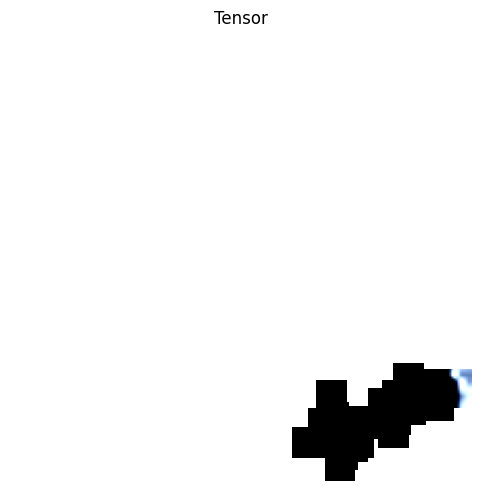

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.2885153].


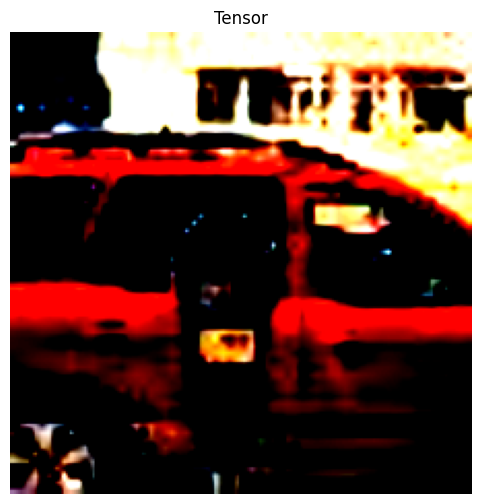

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.2489083].


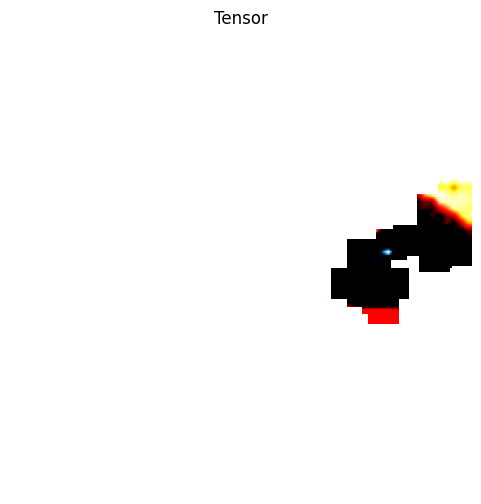

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].


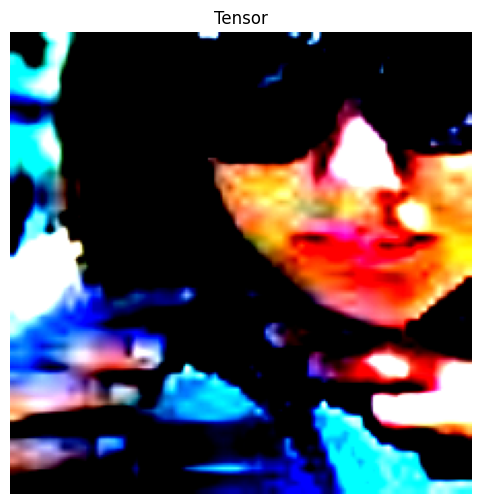

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0151556..1.6813943].


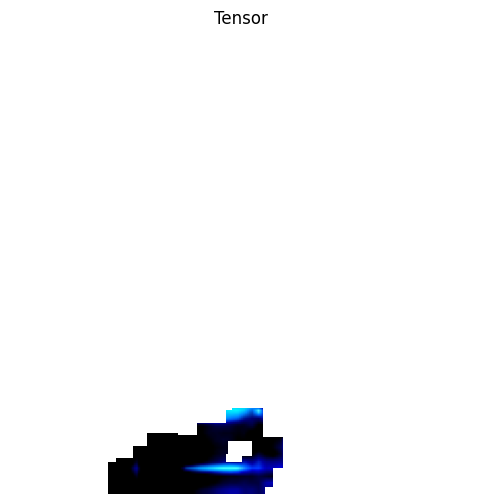

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].


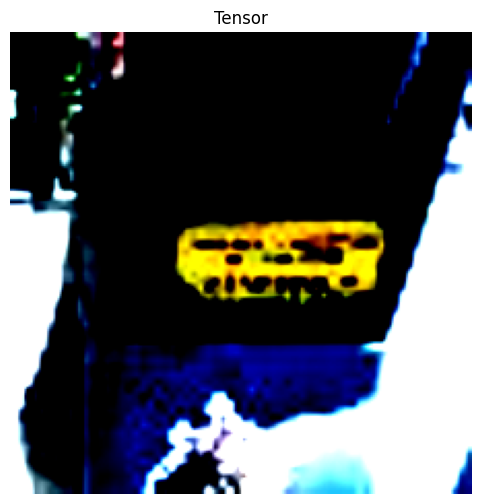

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0151556..2.6225708].


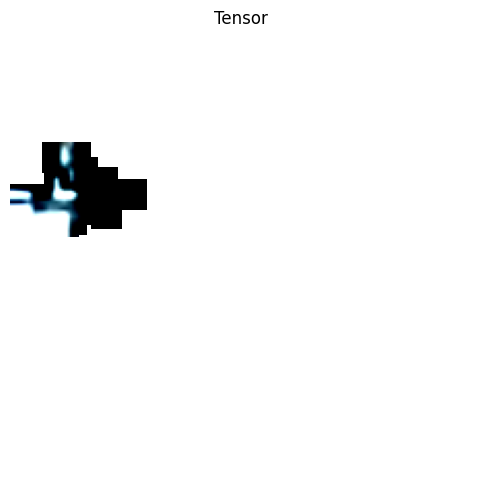

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.169412].


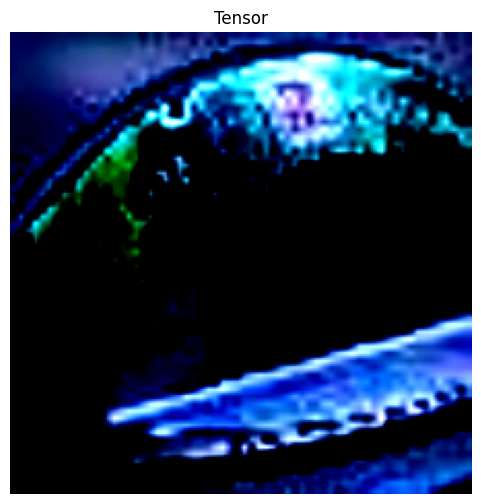

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.1007793..1.2108061].


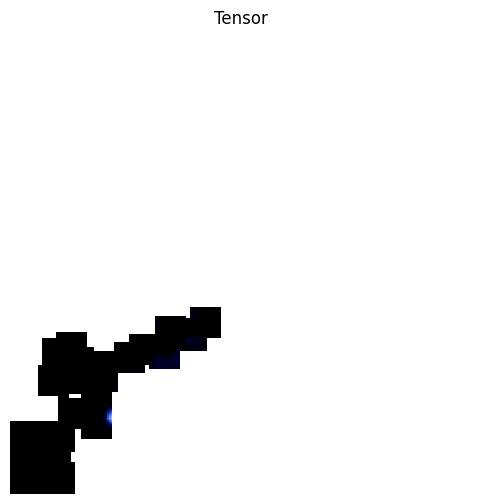

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].


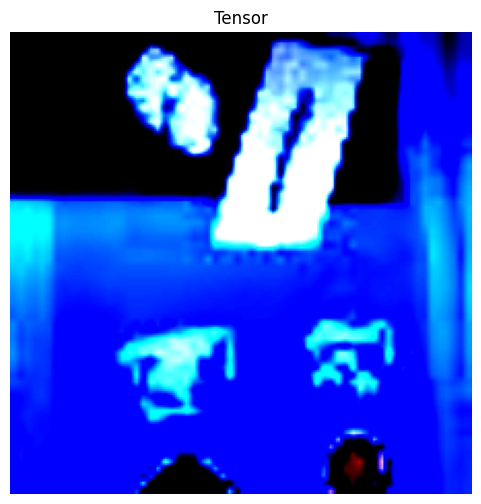

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0836544..2.64].


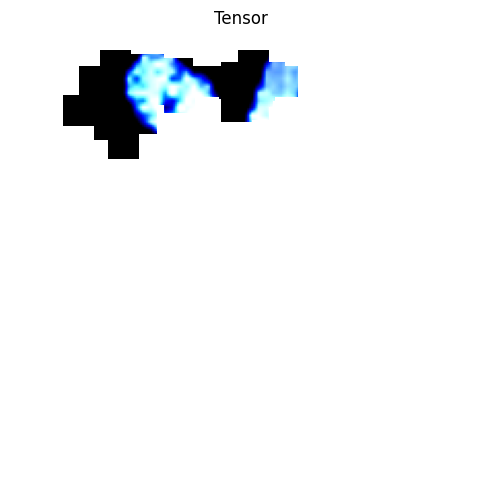

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.0322802..2.64].


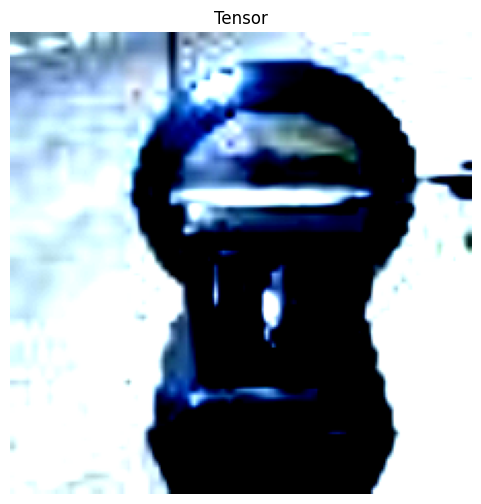

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.4500386..1.8905447].


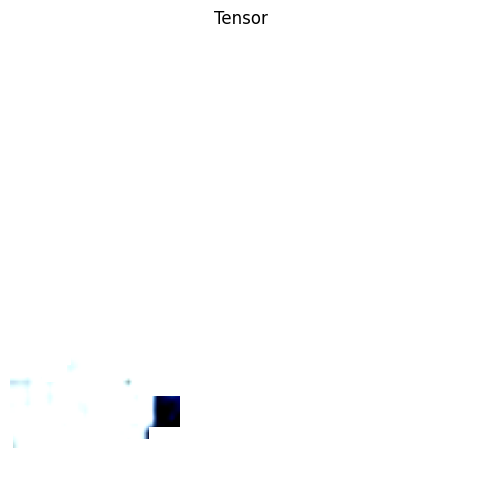

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.64].


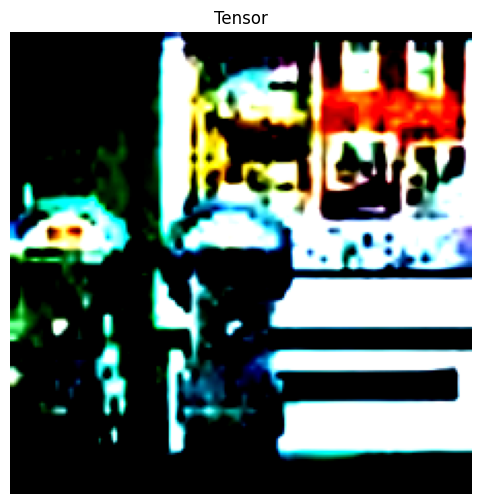

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.6225708].


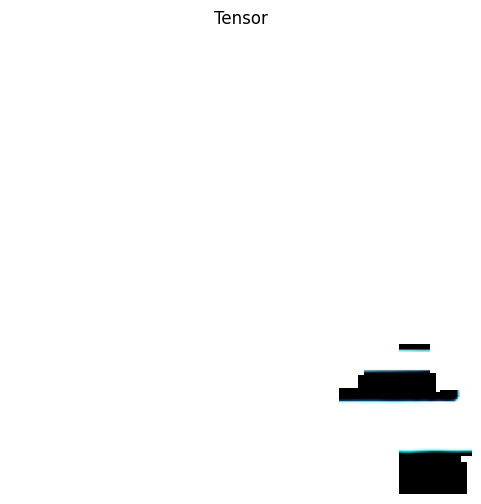

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.018207..2.64].


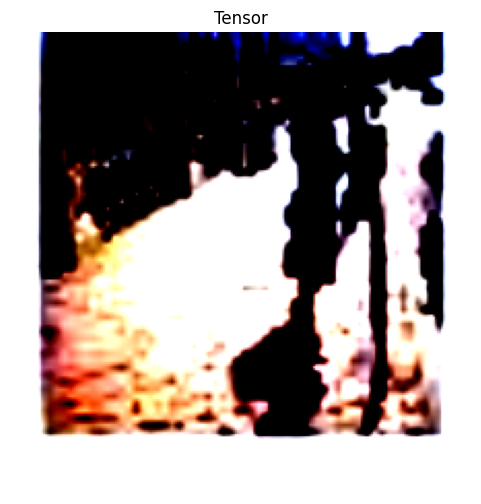

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9481791..2.6225708].


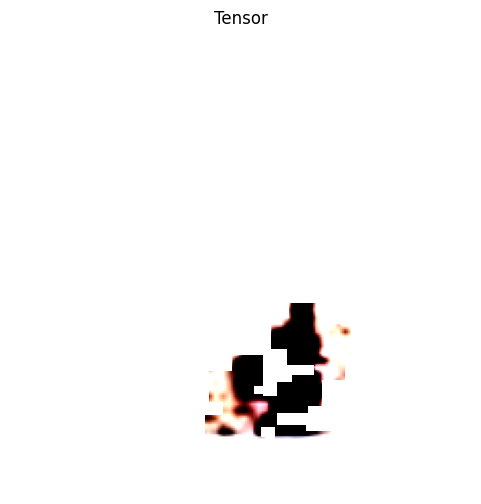

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-2.117904..2.535425].


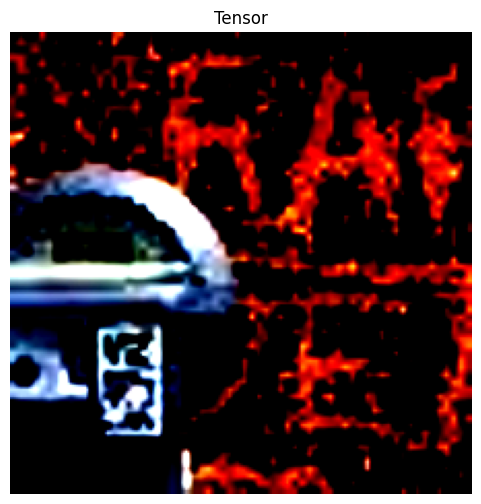

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.9131652..2.535425].


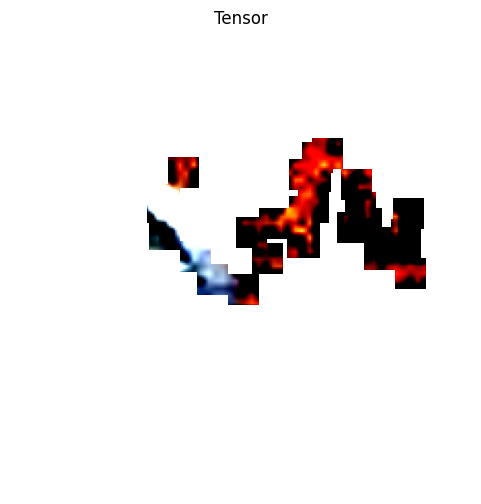

In [98]:
env = ImageExplorationEnv(env_config)
print(env.v_max_x)
print(env.v_max_y)
print(env.v_max_z)
for _ in range(env._max_steps):
  sample_action = env.action_space.sample()
  print(sample_action)
  sample_action = torch.from_numpy(sample_action)
  sample_action = env._denormalize_action(sample_action)
  print(sample_action)
  env.move(sample_action)

for i in range(env.batch_size):
  visualize_tensor(env.img[i])
  visualize_tensor(env.sampled_img[i])


### Agent training

In [103]:

policy_kwargs = dict(
    features_extractor_class=CustomResNetFeatureExtractor,
    features_extractor_kwargs=dict(features_dim=512),
)

resnet_rl_model = PPO(
    "CnnPolicy",
    env,
    policy_kwargs=policy_kwargs,
    verbose=1,
      n_steps=rl_num_steps,
    batch_size=rl_batch_size
)

# TODO: Fix grad error
for i, batch in enumerate(tiny_imagenet_train_loader):
    # Set image with batch change: https://stable-baselines3.readthedocs.io/en/master/guide/vec_envs.html
    vec_env = resnet_rl_model.get_env()  
    vec_env.env_method("set_img", batch)
    resnet_rl_model.learn(total_timesteps=2 * rl_num_steps, progress_bar=False)
    
    if i == 1:
        break

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
---------------------------
| time/              |    |
|    fps             | 0  |
|    iterations      | 1  |
|    time_elapsed    | 20 |
|    total_timesteps | 16 |
---------------------------


ValueError: Expected parameter loc (Tensor of shape (4, 30)) of distribution Normal(loc: torch.Size([4, 30]), scale: torch.Size([4, 30])) to satisfy the constraint Real(), but found invalid values:
tensor([[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan],
        [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
         nan, nan, nan, nan, nan, nan]], grad_fn=<AddmmBackward0>)

In [ ]:
# test_env = ImageExplorationEnv(env_config)
test_env = resnet_rl_model.env.envs[0].env


# Reset environment and get initial observation
obs, _ = test_env.reset()

# Number of steps to run the evaluation
num_eval_steps = 30

# Disable training mode
resnet_rl_model.policy.eval()

for step in range(num_eval_steps):

    obs_tensor = torch.tensor(obs, dtype=torch.float32)
    action, _ = resnet_rl_model.predict(obs_tensor, deterministic=True)
    obs, reward, terminated, truncated, _ = test_env.step(action)

    # Print results
    print(f"Step {step + 1}: Action={action}, Reward={reward}")

    # if terminated or truncated:
    #     print("Episode ended, resetting environment.")
    #     obs, _ = test_env.reset()

In [ ]:
visualize_tensor(test_env.img)
visualize_tensor(test_env.sampled_img)